<a href="https://colab.research.google.com/github/phoebezhouhuixin/NLPwithTF/blob/master/gatedrecurrentunit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple Layer GRU

In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf

In [2]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteND7NDI/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteND7NDI/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteND7NDI/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [3]:
tokenizer = info.features['text'].encoder

In [4]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, train_dataset.output_shapes)
test_dataset = test_dataset.padded_batch(BATCH_SIZE, test_dataset.output_shapes)

Instructions for updating:
Use `tf.compat.v1.data.get_output_shapes(dataset)`.


Instructions for updating:
Use `tf.compat.v1.data.get_output_shapes(dataset)`.


In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64, input_length=120),
    tf.keras.layers.Conv1D(128, 5, activation='relu'), 
    tf.keras.layers.GlobalAveragePooling1D(),
    '''
        Layer (type)                 Output Shape              Param #   
    =================================================================
    embedding_2 (Embedding)      (None, 120, 64)           523840    
    _________________________________________________________________
    conv1d_2 (Conv1D)            (None, 116, 128)          41088     
    _________________________________________________________________
    global_average_pooling1d_2   (None, 128)               0         
    _________________________________________________________________
    '''
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()
# Words will be grouped into groups the size of the filter, in this case 5.
# Each of the groups will now be represented in 128-dimensional space,
# just as how each word was represented in 64-dimensional space (the embedding vector).
# So the sentiment prediction of a sequence depends on what sort of 5-word groups are in the sequence.
# Note: the number of groups is 116, less than the number of words 120, unless we use padding

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 120, 64)           523840    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 116, 128)          41088     
_________________________________________________________________
global_average_pooling1d_2 ( (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 573,249
Trainable params: 573,249
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
NUM_EPOCHS= 10
callback = tf.keras.callbacks.EarlyStopping(monitor= "val_loss", patience = 3, verbose = 1)
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset, callbacks = [callback])

Epoch 1/10
391/391 [==============================] - 33s 83ms/step - loss: 0.4508 - accuracy: 0.7745 - val_loss: 0.3156 - val_accuracy: 0.8720
Epoch 2/10
391/391 [==============================] - 21s 53ms/step - loss: 0.2212 - accuracy: 0.9171 - val_loss: 0.3047 - val_accuracy: 0.8766
Epoch 3/10
391/391 [==============================] - 19s 49ms/step - loss: 0.1718 - accuracy: 0.9375 - val_loss: 0.3234 - val_accuracy: 0.8748
Epoch 4/10
391/391 [==============================] - 19s 48ms/step - loss: 0.1388 - accuracy: 0.9513 - val_loss: 0.3510 - val_accuracy: 0.8686
Epoch 5/10
391/391 [==============================] - 19s 48ms/step - loss: 0.1133 - accuracy: 0.9607 - val_loss: 0.4174 - val_accuracy: 0.8632
Epoch 00005: early stopping


In [17]:
import matplotlib.pyplot as plt
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

  plot_graphs(history, 'accuracy') # plot_graphs(history, 'loss')

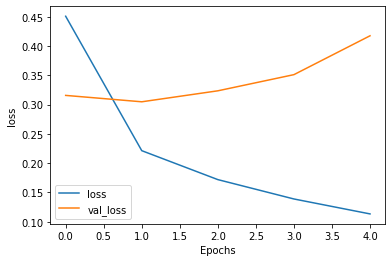

In [15]:
plot_graphs(history, 'loss')

In [16]:
model.evaluate(test_dataset, verbose = 1)

391/391 [==============================] - 5s 13ms/step - loss: 0.4174 - accuracy: 0.8632


[0.4174085557460785, 0.8632400035858154]